In [ ]:
import geopandas as gpd
import pandas as pd

# Read the vector dataset
saxonyGrid_gdf = gpd.read_file(r"C:\Users\smock\Desktop\thesis_data_local\spatial_data\consolidatedThesisData.gpkg", layer = "snGrid100mLEAE")

# Read the CSV files
build= pd.read_csv(r'C:\Users\smock\Desktop\thesis_data_local\spatial_data\2011census\csv_Gebaeude_100m_Gitter\geb100m_wide.csv')
apart= pd.read_csv(r"C:\Users\smock\Desktop\thesis_data_local\spatial_data\2011census\csv_Wohnungen_100m_Gitter\wohn100m_wide.csv")

# Perform the join on 'id' and 'Gitter_ID_100m'
joined_data = saxonyGrid_gdf.merge(build.add_prefix('build_'), left_on='id', right_on='Gitter_ID_100m')
joined_data = joined_data.merge(apart.add_prefix('apart_'), left_on='id', right_on='Gitter_ID_100m')

# Discard the columns in the input vector file
filtered_columns = [col for col in joined_data.columns if col.startswith('csv1_') or col.startswith('csv2_') or col == 'id']
snGrid_buil_apart = joined_data[filtered_columns]

# Save the filtered data to a new file
output_file = r"C:\Users\smock\Desktop\thesis_data_local\spatial_data\consolidatedThesisData.gpkg"
 
snGrid_buil_apart.to_file(output_file, driver = "GPKG")



In [ ]:
# view data types in building csv
import geopandas as gpd

# Read the GeoDataFrame from a shapefile
buildings = gpd.read_file(r"C:\Users\smock\Desktop\thesis_data_local\spatial_data\consolidatedThesisData.gpkg", layer = "snGrid100m_build", rows = 10)


# Get column names and data types
columns = buildings.columns
data_types = buildings.dtypes

# Print column names and data types
for column, data_type in zip(columns, data_types):
    print(column, ":", data_type)

In [ ]:
# view data types in joined building geodataframe
import geopandas as gpd

# Read the GeoDataFrame from a shapefile
buildings = gpd.read_file(r"C:\Users\smock\Desktop\thesis_data_local\spatial_data\consolidatedThesisData.gpkg", layer = "snGrid100m_build", rows = 10)


# Get column names and data types
columns = buildings.columns
data_types = buildings.dtypes

# Print column names and data types
for column, data_type in zip(columns, data_types):
    print(column, ":", data_type)

In [5]:
#find out how many 100mx100m squares are covered by the buildings data set
import pandas as pd

build= pd.read_csv(r'C:\Users\smock\Desktop\thesis_data_local\spatial_data\2011census\csv_Gebaeude_100m_Gitter\geb100m_wide.csv')

print(build['Gitter_ID_100m'].nunique())

2477617


In [24]:
import geopandas as gpd
import pandas as pd

gdf = gpd.read_file(r"C:\Users\smock\Desktop\thesis_data_local\spatial_data\consolidatedThesisData.gpkg", layer = "snGrid100m_build", rows = 10)

sum_dict = {}

# Calculate the sum for each column and add it to the dictionary
for column in buildings.columns:
    if column.startswith('_build') & pd.to_numeric(gdf[column], errors='coerce').notnull().all():
  
        gdf[column] = gdf[column].astype(int)
        sum_dict["sum_" + column] = gdf[column].sum()

total_records = 0
print(sum_dict)

for entry in sum_dict:
    print(entry, ':', sum_dict[entry] )
    total_records += sum_dict[entry]

print("Total: ", total_heat_records)



{}
Total:  0


In [93]:
#sandbox for getting data characteristics
import geopandas as gpd
import pandas as pd

census = gpd.read_file('/Users/sunshinedaydream/Desktop/thesis_data_local/spatial_data/consolidatedThesisData.gpkg', layer = 'snGrid100m_build', rows=10, encoding = 'cp1252')
eubucco = gpd.read_file("/Users/sunshinedaydream/Desktop/thesis_data_local/spatial_data/EUBUCCO/sachsenEUBUCCO.gpkg", layer = "sachsenEUBUCCO" , rows =10000, include_fields = ['type'])


# Assuming you have a geodataframe named 'geodf'
# cens_cols = census.columns
# eubucco_cols = eubucco.columns
print(census.crs)
print(eubucco.crs)



#print ('cens_cols:', cens_cols,)
# print ('eubucco copls:', eubucco_cols)
#print("Unique EUBUCCO Building types:", eubucco['type'].unique())
#print( unique(eubucco['age']))

# print("\nData Types:")
# for column, dtype in data_types.iteritems():
#     print(f"{column}: {dtype}")


epsg:3035
epsg:3035


In [64]:
import geopandas as gpd
from shapely.geometry import box

mask_area = gpd.read_file('/Users/sunshinedaydream/Desktop/thesis_data_local/spatial_data/consolidatedThesisData.gpkg', layer = 'leipzigArea')

relevantColsEUBUCCO = ['id', 'height', 'age']
relevantColsCensus = ['build_Gitter_ID_100m', 'build_Anderer GebÃ¤udetyp',
       'build_Blockheizung', 'build_DoppelhaushÃ¤lfte',
       'build_Einfamilienhaus: DoppelhaushÃ¤lfte',
       'build_Einfamilienhaus: Reihenhaus',
       'build_Einzel-/MehrraumÃ¶fen (auch Nachtspeicherheizung)',
       'build_Etagenheizung', 'build_Fernheizung (FernwÃ¤rme)',
       'build_Freistehendes Einfamilienhaus', 'build_Freistehendes Haus',
       'build_Freistehendes Zweifamilienhaus', 'build_Gereihtes Haus',
       'build_Keine Heizung im GebÃ¤ude oder in den Wohnungen',
       'build_Mehrfamilienhaus: 13 und mehr Wohnungen',
       'build_Mehrfamilienhaus: 3-6 Wohnungen',
       'build_Mehrfamilienhaus: 7-12 Wohnungen',
       'build_Sonstige GebÃ¤ude mit Wohnraum',
       'build_WohngebÃ¤ude (ohne Wohnheime)', 'build_Wohnheime',
       'build_Zentralheizung', 'build_Zweifamilienhaus: DoppelhaushÃ¤lfte',
       'build_Zweifamilienhaus: Reihenhaus', 'geometry']

# Load the geodataframes
#buildEUBUCCO = gpd.read_file("/Users/sunshinedaydream/Desktop/thesis_data_local/spatial_data/EUBUCCO/sachsenEUBUCCO.gpkg", layer = "sachsenEUBUCCO")
gridHeat = gpd.read_file('/Users/sunshinedaydream/Desktop/thesis_data_local/spatial_data/consolidatedThesisData.gpkg', layer = 'snGrid100m_build', include_fields = relevantColsCensus)

# Filter gridHeat based on squares that have a census entry for residential building (not null) and have no district or block heating
filtered_gridHeat = gridHeat[(gridHeat['build_Fernheizung (FernwÃ¤rme)'].fillna(0).astype(int) == 0) & (gridHeat['build_Blockheizung'].fillna(0).astype(int) == 0) & (gridHeat['build_Gitter_ID_100m'].notnull())]

# # Perform spatial join to identify intersecting features
# intersecting_features = gpd.sjoin(buildEUBUCCO, filtered_gridHeat, predicate = "")

#add summary columns for residential_count, and remove those for which the count = 0
filtered_gridHeat['residential_count'] = (filtered_gridHeat['build_Sonstige GebÃ¤ude mit Wohnraum'].fillna(0).astype(int)) + filtered_gridHeat['build_WohngebÃ¤ude (ohne Wohnheime)'].fillna(0).astype(int) + filtered_gridHeat['build_Wohnheime'].fillna(0).astype(int) 

#print (filtered_gridHeat.dtypes)
filtered_gridHeat = filtered_gridHeat[filtered_gridHeat['residential_count']>0]

# Print the filtered geodataframe
filtered_gridHeat.to_file('/Users/sunshinedaydream/Desktop/thesis_data_local/spatial_data/consolidatedThesisData.gpkg', layer = 'candidate_Grid', driver = "GPKG")

/Users/sunshinedaydream/anaconda3/lib/python3.10/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
/Users/sunshinedaydream/anaconda3/lib/python3.10/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [56]:
import pandas as pd 

df = pd.read_csv('/Users/sunshinedaydream/Desktop/thesis_data_local/spatial_data/2011census/csv_Gebaeude_100m_Gitter/Geb100m.csv', encoding = 'cp1252')

df = df[df['Merkmal'].isin(['GEBTYPGROESSE'])]
       

df.reset_index(drop=True)
# Pivot the DataFrame using Gitter_ID_100m as the pivot column
piv = pd.pivot_table(df, index='Gitter_ID_100m', columns='Auspraegung_Text', values='Anzahl', aggfunc='sum')

piv.columns


Index(['Anderer Gebäudetyp', 'Einfamilienhaus: Doppelhaushälfte',
       'Einfamilienhaus: Reihenhaus', 'Freistehendes Einfamilienhaus',
       'Freistehendes Zweifamilienhaus',
       'Mehrfamilienhaus: 13 und mehr Wohnungen',
       'Mehrfamilienhaus: 3-6 Wohnungen', 'Mehrfamilienhaus: 7-12 Wohnungen',
       'Zweifamilienhaus: Doppelhaushälfte', 'Zweifamilienhaus: Reihenhaus'],
      dtype='object', name='Auspraegung_Text')

In [46]:
import pandas as pd
import geopandas as gpd

candidateGrid_gdf = gpd.read_file('/Users/sunshinedaydream/Desktop/thesis_data_local/spatial_data/consolidatedThesisData.gpkg', layer = "candidate_Grid")
apartmentData_pd = pd.read_csv('/Users/sunshinedaydream/Desktop/thesis_data_local/spatial_data/2011census/csv_Wohnungen_100m_Gitter/apartment_totals_100m.csv')

def force_integer(value):
    try:
        return int(value)
    except ValueError:
        return None

# Specify the path to your file and the converters dictionary
file_path = "path/to/your/file.geojson"  # Replace with the actual file path
converters = {
    "building_id": force_integer,
    # Add more columns and corresponding conversion functions if needed
}

# Read the file using geopandas.read_file with the converters parameter
gdf = gpd.read_file(file_path, converters=converters)



In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np


buildDict = pd.read_csv('/Users/sunshinedaydream/Desktop/thesis_data_local/non-spatial/building_type_dict.csv')

buildType = 'siz_1_row'
eubucco = gpd.read_file("/Users/sunshinedaydream/Desktop/thesis_data_local/spatial_data/consolidatedThesisData.gpkg", layer = "snEUBUCCOClean",  rows = 10)
matched_buildings_list = [[row['building_id'], buildType] for _, row in eubucco.iterrows()]

print(buildDict.loc[buildDict['name'] == buildType]['max_floors'].values[0])
reducedEUBUCCO = eubucco[eubucco['floors'] >= buildDict.loc[buildDict['name'] == buildType]['min_floors'].values[0]
&
True
]

print(reducedEUBUCCO)

a = [[1,2], [2,3], [3,4]]
b=[[2,3], [2,6]]

a.extend(b)
print(a)

In [10]:
import pandas as pd
import geopandas as gpd


reconciler_output_df = pd.read_csv('/Users/sunshinedaydream/Desktop/thesis_data_local/non-spatial/censusReconciler.csv')
eubucco = gpd.read_file("/Users/sunshinedaydream/Desktop/thesis_data_local/spatial_data/consolidatedThesisData.gpkg", layer = "snEUBUCCOClean")
reconciler_output_df.rename(columns={"type": "assigned_type"}, inplace=True)

#census = gpd.read_file('/Users/sunshinedaydream/Desktop/thesis_data_local/spatial_data/consolidatedThesisData.gpkg', layer = "candidateGridsCLEAN")

eubucco = eubucco.merge(reconciler_output_df, on = 'building_id')


#eubucco.groupby('assigned_type').living_area.mean().to_csv('/Users/sunshinedaydream/Desktop/thesis_data_local/non-spatial/pre1000mfilter_avg_la.csv')


#print('the unique values in original type are: ', eubucco.type.unique())

eubucco.drop(columns = ['type'])


for column in eubucco.columns:
    if column not in ['assigned_type', 'type', 'geometry']:
        eubucco[column] = eubucco[column].fillna(0).astype(int)

eubucco = eubucco[eubucco['living_area'] <= 1000]

eubucco.groupby('assigned_type').living_area.mean().to_csv('/Users/sunshinedaydream/Desktop/thesis_data_local/non-spatial/average_la_postfilter.csv')
eubucco.groupby('assigned_type').building_id.count().to_csv('/Users/sunshinedaydream/Desktop/thesis_data_local/non-spatial/building_count_post1000m2filter.csv')


eubucco.to_file('/Users/sunshinedaydream/Desktop/thesis_data_local/spatial_data/consolidatedThesisData.gpkg', layer = 'candidateEUBUCCO_MATCHED_CLEANED', driver = 'GPKG')





the unique values in original type are:  ['Polygon']


/Users/sunshinedaydream/anaconda3/lib/python3.10/site-packages/geopandas/io/file.py:299: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [6]:
import pandas as pd
copDict = pd.read_csv('/Users/sunshinedaydream/Desktop/thesis_data_local/non-spatial/codeDictionaries/copDict.csv')

cop_value = copDict.loc[copDict['temp'] == 43]['cop'] 

print(cop_value)

60    7.55476
Name: cop, dtype: float64


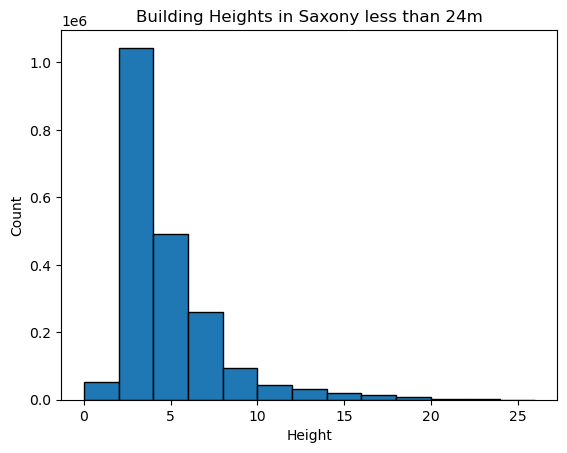

In [14]:
import geopandas as gpd
import matplotlib.pyplot as plt

relevant_cols = ['id', 'height']
gdf = gpd.read_file("/Users/sunshinedaydream/Desktop/thesis_data_local/spatial_data/EUBUCCO/sachsenEUBUCCO.gpkg", layer = "sachsenEUBUCCO", include_fields = relevant_cols)

bin_width = 2
min_height = 0
max_height = 24
num_bins = int((max_height - min_height) / bin_width) + 1

# Plot histogram
plt.hist(gdf['height'], bins=num_bins, range=(min_height, max_height+bin_width), edgecolor='black')

plt.xlabel('Height')
plt.ylabel('Count')
plt.title('Building Heights in Saxony less than 24m')

plt.show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/sunshinedaydream/Desktop/thesis_data_local/spatial_data/scratch/avgTemps.csv')



# Assuming the column "monthlyAvgTemps" contains strings representing lists,
# let's convert them to actual Python lists using ast.literal_eval
import ast
df['monthlyAvgTemp'] = df['monthlyAvgTemp'].apply(ast.literal_eval)

# Find the maximum and minimum length of lists in the "monthlyAvgTemps" column
max_length = df['monthlyAvgTemp'].apply(len).max()
min_length = df['monthlyAvgTemp'].apply(len).min()

# Print the results
print(f"Maximum length of lists: {max_length}")
print(f"Minimum length of lists: {min_length}")

del(cop)
de

Maximum length of lists: 12
Minimum length of lists: 12
